# 作业3

### 第1题：Numpy 练习

以下运算都可以调用相应的函数而避免使用显式循环。

In [1]:
import numpy as np


(a) 生成1000个服从 (0, 1) 间均匀分布的随机数，赋值给变量 `x`，并打印其最后10个元素。

In [2]:
# 此处插入代码
np.random.seed(2020111142)
x = np.random.uniform(0,1,1000)
print(x[-10:])

[0.55013168 0.28422192 0.53188413 0.56307488 0.01439873 0.09039268
 0.61793307 0.27170328 0.4029252  0.63552254]


(b) 创建向量 `y`，令其在数学上等于 $y=-\log(x)$，其中 $\log$ 为自然对数，并打印其前10个元素。查找在 Python 中绘制图形的方法，绘制 `y` 的直方图。

[0.57674715 0.95420365 0.01668096 0.69331745 0.06451825 1.706717
 2.89623445 0.45719508 1.43700078 1.64907451]


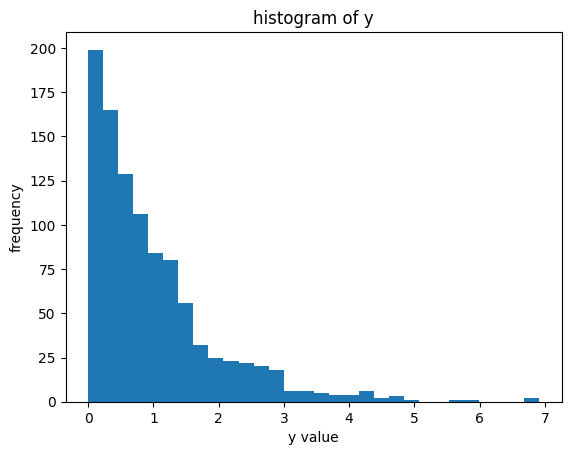

In [3]:
# 此处插入代码
y = -np.log(x)
print(y[:10])

import matplotlib.pyplot as plt
plt.hist(x = y, bins = 30)
plt.title("histogram of y")
plt.xlabel("y value")
plt.ylabel("frequency")
plt.show()

(c) 猜测或证明 `y` 服从什么分布，并简要说明理由。

y服从$\lambda$为1的指数分布。

理由：指数分布的分布函数为$F(y)=1-e^{-\lambda y}$，令$x=F(y)=1-e^{-\lambda y}$，可解得$y=-\frac{1}{\lambda}\log(1-x)$，由于x服从(0,1)间均匀分布，1-x也服从于(0,1)均匀分布，因此$y=-\frac{1}{\lambda}\log(x)$来生成指数分布随机数，所以$y=-\log(x)$服从$\lambda$为1的指数分布。

(d) 将 `y` 转为 $200\times 5$ 的矩阵，赋值给 `mat1`，元素**按行排列**。打印其前5行。

In [4]:
# 此处插入代码
mat1 = np.reshape(y,(200,5),'C')
print(mat1[:5,:])

[[0.57674715 0.95420365 0.01668096 0.69331745 0.06451825]
 [1.706717   2.89623445 0.45719508 1.43700078 1.64907451]
 [1.53815084 0.53819804 0.5333801  1.36263196 1.11737224]
 [0.58151029 1.30417863 0.44745282 0.03650723 0.91712171]
 [0.70529628 0.85029417 1.2923237  0.54612135 1.01277792]]


(e) 将 `y` 转为 $200\times 5$ 的矩阵，赋值给 `mat2`，元素**按列排列**。打印其前5行。（提示：可以使用转置操作）

In [5]:
# 此处插入代码
mat2 = np.reshape(y,(200,5),'F')
print(mat2[:5,:])

[[0.57674715 2.57108007 0.23577878 1.36970075 0.48418259]
 [0.95420365 0.06974796 0.31054726 0.06272007 0.54373793]
 [0.01668096 0.12921928 0.19496057 0.16018067 0.81253708]
 [0.69331745 1.86183692 0.01631035 0.07881109 0.06480507]
 [0.06451825 0.65288098 1.36496123 0.92015216 0.61018258]]


(f) 计算 `mat1` 每一列的均值，得到一个长度为5的向量 `v`，将其打印出来。然后将 `mat1` 的每一列进行中心化（即减去各自的均值），赋给变量 `mat1_centered`。类似地，计算 `mat1_centered` 的列均值向量并打印出来。

In [6]:
# 此处插入代码
v = mat1.mean(axis=0)
print(v)
mat1_centered = mat1-v
print(mat1_centered.mean(axis=0))

[1.01475786 1.01614718 0.90042134 1.06971835 0.94970603]
[-2.89768209e-16  2.39253062e-16 -2.33146835e-16 -5.08482145e-16
 -7.49400542e-18]


### 第2题：统计计算练习

(a) 生成一个 $10000\times 1000$ 的矩阵 `X`，每个元素服从标准正态分布。生成一个长度为 10000 的向量 `y`，每个元素服从均值为0、方差为2的正态分布。生成一个长度为 10000 的向量 `w`，每个元素服从 $(1,5)$ 上的均匀分布。

In [7]:
# 此处插入代码
np.random.seed(2020111142)
x = np.random.normal(0,1,(10000,1000))
y = np.random.normal(0,2**0.5,10000)
w = np.random.uniform(1,5,10000)

(b) 使用恰当的方式计算 $\hat{y}=X(X^{T}WX)^{-1}X^{T}Wy$，其中 `W` 是以 `w` 为对角线的对角矩阵。

In [19]:
import time
t1 = time.time()

# 此处插入代码
right = x.T.dot(w*y)
inv = (x.T*w).dot(x)
right = np.linalg.solve(inv,right)
yhat = x.dot(right)

t2 = time.time()
print(yhat)
print(f"running time: {t2 - t1} seconds.")

[ 0.86667276 -0.50098783 -0.12361116 ...  0.03907953  0.0412403
  0.00345097]
running time: 0.3329777717590332 seconds.


In [20]:
import time
t1 = time.time()

# 此处插入代码
Q = x.T*w
right = Q.dot(y)
inv = Q.dot(x)
right = np.linalg.solve(inv,right)
yhat = x.dot(right)

t2 = time.time()
print(yhat)
print(f"running time: {t2 - t1} seconds.")

[ 0.86667276 -0.50098783 -0.12361116 ...  0.03907953  0.0412403
  0.00345097]
running time: 0.37770509719848633 seconds.


### 第3题：PySpark RDD 练习

利用如下代码模拟生成一个 $100000\times 10$ 的矩阵，并写入文件 `sim_data.txt`。

In [10]:
import numpy as np
np.random.seed(123)
dat = np.random.uniform(size=(100000, 10))
np.savetxt("sim_data.txt", dat, fmt="%.6f", delimiter=",")

In [11]:
np.var(dat,axis=0)

array([0.08296794, 0.08328157, 0.08358426, 0.08287924, 0.08328201,
       0.08316877, 0.08332026, 0.08297215, 0.08334429, 0.08343068])

使用合适的命令以单机模式启动 PySpark，并使用4个 CPU 核心。

In [12]:
# 此处插入代码
import findspark
findspark.init()

from pyspark.sql import SparkSession
# 本地模式
spark = SparkSession.builder.\
    master("local[4]").\
    appName("PySpark RDD").\
    getOrCreate()
sc = spark.sparkContext
# sc.setLogLevel("ERROR")
print(spark)
print(sc)

<SparkContext master=local[4] appName=PySpark RDD>


利用 PySpark 读取文件并打印出前5行：

In [13]:
# 此处插入代码
file = sc.textFile("sim_data.txt")
text = file.take(5)
print(*text, sep="\n")

0.696469,0.286139,0.226851,0.551315,0.719469,0.423106,0.980764,0.684830,0.480932,0.392118
0.343178,0.729050,0.438572,0.059678,0.398044,0.737995,0.182492,0.175452,0.531551,0.531828
0.634401,0.849432,0.724455,0.611024,0.722443,0.322959,0.361789,0.228263,0.293714,0.630976
0.092105,0.433701,0.430863,0.493685,0.425830,0.312261,0.426351,0.893389,0.944160,0.501837
0.623953,0.115618,0.317285,0.414826,0.866309,0.250455,0.483034,0.985560,0.519485,0.612895


利用 `map()` 函数，生成一个元素类型为 Numpy 向量的 RDD，其每一个元素对应原始文本数据的每一行。打印出该 RDD 的前5个元素。

In [14]:
# 此处插入代码
def str_to_vec(line):
    str_vec = line.split(',')
    num_vec = map(lambda x:float(x),str_vec)
    return np.fromiter(num_vec,dtype=float)

dat = file.map(str_to_vec) # 对每一行使用 str_to_vec 传进函数的是一行字符串
print(dat.take(5))

[array([0.696469, 0.286139, 0.226851, 0.551315, 0.719469, 0.423106,
       0.980764, 0.68483 , 0.480932, 0.392118]), array([0.343178, 0.72905 , 0.438572, 0.059678, 0.398044, 0.737995,
       0.182492, 0.175452, 0.531551, 0.531828]), array([0.634401, 0.849432, 0.724455, 0.611024, 0.722443, 0.322959,
       0.361789, 0.228263, 0.293714, 0.630976]), array([0.092105, 0.433701, 0.430863, 0.493685, 0.42583 , 0.312261,
       0.426351, 0.893389, 0.94416 , 0.501837]), array([0.623953, 0.115618, 0.317285, 0.414826, 0.866309, 0.250455,
       0.483034, 0.98556 , 0.519485, 0.612895])]


利用 `map()` 和 `reduce()` 函数计算每一列的样本方差，并将结果打印出来。要求 `reduce()` 只能使用一次。

In [15]:
# 此处插入代码
n,xsum,x2sum = dat.map(lambda x : (1,x,x**2)).reduce(lambda x,y: (x[0]+y[0],x[1]+y[1],x[2]+y[2]))
xbar = xsum/n
S = (x2sum - n * xbar**2)/(n - 1)
print(S)

[0.08296877 0.08328241 0.0835851  0.08288007 0.08328285 0.0831696
 0.08332109 0.08297298 0.08334512 0.08343152]


将原始文件的 RDD 划为10个分区，然后利用 `mapPartitions()` 函数将每个分区转成一个 Numpy 矩阵，过滤掉空的矩阵，最后得到一个元素类型为 Numpy 矩阵的 RDD。然后打印出该 RDD 的元素个数。

In [16]:
# 此处插入代码
file_p10 = file.repartition(10)

def part_to_map(iter):
    iter_arr = map(str_to_vec, iter) # rdd的分区是迭代器而不是rdd，因此没有map方法，只能用map函数
    dat = list(iter_arr)
    if len(dat)<1:
        mat = np.array([])
    else:
        mat = np.vstack(dat)
    yield mat

dat = file_p10.mapPartitions(part_to_map).filter(lambda x : x.shape[0]>0)
print(dat.count())

10


利用上述 RDD 和 `map()`、`reduce()` 函数计算每一列的样本方差，并将结果打印出来。要求 `reduce()` 只能使用一次。

In [17]:
# 此处插入代码
n_p10,xsum_p10,x2sum_p10 = dat.\
    map(lambda x : (x.shape[0],np.sum(x,axis=0),np.sum(x**2,axis=0))).\
    reduce(lambda x,y:(x[0]+y[0],x[1]+y[1],x[2]+y[2]))
xbar_p10 = xsum_p10/n_p10
S_p10 = (x2sum_p10 - n_p10 * xbar_p10**2)/(n_p10 - 1)
print(S_p10)

[0.08296877 0.08328241 0.0835851  0.08288007 0.08328285 0.0831696
 0.08332109 0.08297298 0.08334512 0.08343152]
